# Crear una version del dataset en formato TIFF

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/dry cropland/patch_GF2_PMS2__L1A0001886305-MSS2_5438_1185_4.raw
(112, 112, 4)


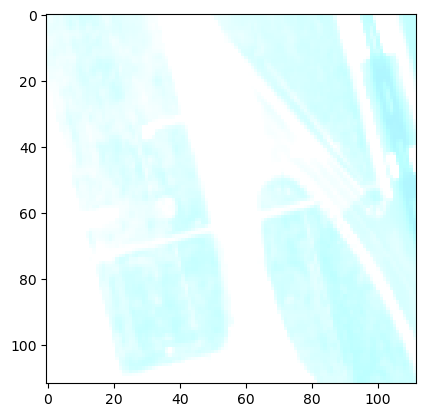

Band 1
Max: 426
Min: 115
Mean: 221.2248086734694
Std: 39.520943531777746


Band 2
Max: 641
Min: 173
Mean: 254.92338966836735
Std: 62.058489898519426


Band 3
Max: 731
Min: 245
Mean: 316.1974649234694
Std: 59.937862355116884


Band 4
Max: 914
Min: 389
Mean: 446.98541135204084
Std: 63.801954825810945




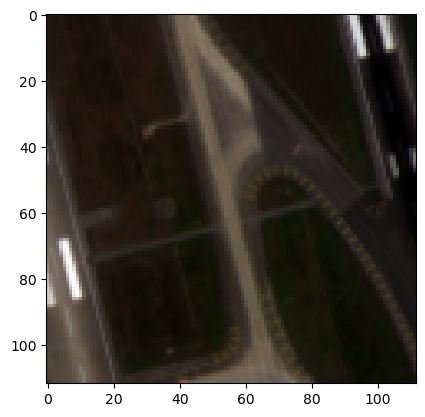

In [3]:
# En esta celda se muestran los
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import gdal
def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image


img_path  = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/"
# save the folders contained in the path as a list
folders = os.listdir(img_path)
# pick one of the folders randomly
folder = np.random.choice(folders)
img_path = os.path.join(img_path, folder)

# pick a random image from the folder
img_name = np.random.choice(os.listdir(img_path))
print((img_path + "/" + img_name))
img = read_rawb_image((img_path + "/" + img_name))

img_path  = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/airport/patch_GF2_PMS1__L1A0001217916-MSS1_924_6693_24.raw"

img = read_rawb_image(img_path)


print(img.shape)
plt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()

# for each band print info about its pixel values

for i in range(4):
    print(f"Band {i+1}")
    print(f"Max: {np.max(img[:,:,i])}")
    print(f"Min: {np.min(img[:,:,i])}")
    print(f"Mean: {np.mean(img[:,:,i])}")
    print(f"Std: {np.std(img[:,:,i])}")
    print("\n")

# Apply min-max normalization to each band
img_norm = np.zeros_like(img, dtype=np.float32)
for i in range(4):
    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))

# show the normalized image
plt.imshow(img_norm[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()



In [23]:
def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image

def save_np_as_tiff(img_path,img):
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(img_path, img.shape[0], img.shape[1], img.shape[2], gdal.GDT_Int16)


    # Write each band to the TIFF file
    for i in range(img.shape[2]):
        # Remember GDAL's band indexing starts from 1
        dataset.GetRasterBand(i + 1).WriteArray(img[:, :, i])

    # Properly close and flush the dataset to disk
    dataset.FlushCache()
    dataset = None

"""
source_folder = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/"
destination_folder = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/tif_dataset/"

for folder in os.listdir(source_folder):
    for img_name in os.listdir(os.path.join(source_folder, folder)):
        img_path = os.path.join(source_folder, folder, img_name)
        
        #create the destination folder if it does not exist
        if not os.path.exists(os.path.join(destination_folder, folder)):
            os.makedirs(os.path.join(destination_folder, folder))
        
        img = read_rawb_image(img_path)

        img_destiny_path = os.path.join(destination_folder, folder, img_name.replace(".raw", ".tiff"))
        print(img_destiny_path)
        save_np_as_tiff(img_destiny_path,img)

"""

'\nsource_folder = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/"\ndestination_folder = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/tif_dataset/"\n\nfor folder in os.listdir(source_folder):\n    for img_name in os.listdir(os.path.join(source_folder, folder)):\n        img_path = os.path.join(source_folder, folder, img_name)\n        \n        #create the destination folder if it does not exist\n        if not os.path.exists(os.path.join(destination_folder, folder)):\n            os.makedirs(os.path.join(destination_folder, folder))\n        \n        img = read_rawb_image(img_path)\n\n        img_destiny_path = os.path.join(destination_folder, folder, img_name.replace(".raw", ".tiff"))\n        print(img_destiny_path)\n        save_np_as_tiff(img_destiny_path,img)\n\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


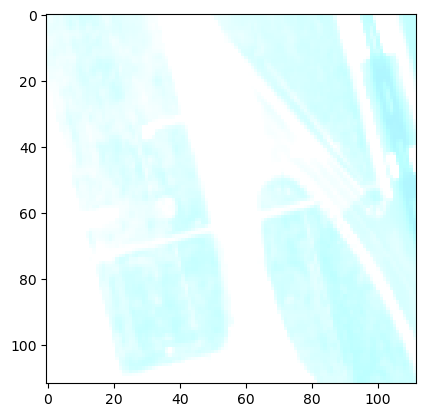

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Band 1
Max: 426
Min: 115
Mean: 221.2248086734694
Std: 39.520943531777746


Band 2
Max: 641
Min: 173
Mean: 254.92338966836735
Std: 62.058489898519426


Band 3
Max: 731
Min: 245
Mean: 316.1974649234694
Std: 59.937862355116884


Band 4
Max: 914
Min: 389
Mean: 446.98541135204084
Std: 63.801954825810945


Band 1
Max: 426.0
Min: 115.0
Mean: 221.2248086734694
Std: 39.520943531777746


Band 2
Max: 641.0
Min: 173.0
Mean: 254.92338966836735
Std: 62.058489898519426


Band 3
Max: 731.0
Min: 245.0
Mean: 316.1974649234694
Std: 59.937862355116884


Band 4
Max: 914.0
Min: 389.0
Mean: 446.98541135204084
Std: 63.801954825810945




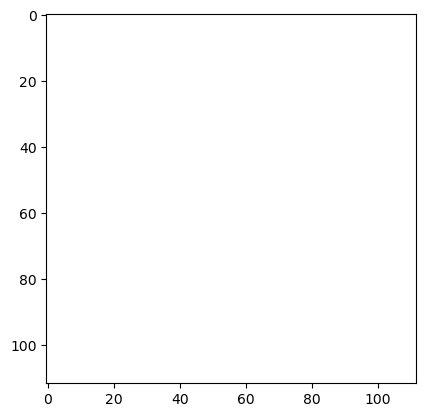

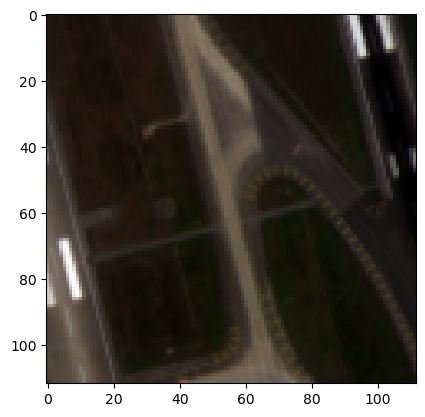

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal




def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image

test = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/dataset/airport/patch_GF2_PMS1__L1A0001217916-MSS1_924_6693_24.raw"

def save_np_as_tiff(img_path,img):
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(img_path, img.shape[0], img.shape[1], img.shape[2], gdal.GDT_Int16)

    for i in range(img.shape[2]):
        dataset.GetRasterBand(i + 1).WriteArray(img[:, :, i])

    dataset.FlushCache()
    dataset = None

img = read_rawb_image(test)

plt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()
#print image info for each band

for i in range(4):
    print(f"Band {i+1}")
    print(f"Max: {np.max(img[:,:,i])}")
    print(f"Min: {np.min(img[:,:,i])}")
    print(f"Mean: {np.mean(img[:,:,i])}")
    print(f"Std: {np.std(img[:,:,i])}")
    print("\n")

save_np_as_tiff("./test.tiff",img)

# Load the saved tiff image
dataset = gdal.Open("./test.tiff")
img = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount))
for i in range(dataset.RasterCount):
    img[:, :, i] = dataset.GetRasterBand(i + 1).ReadAsArray()



# for each band print info about its pixel values

for i in range(4):
    print(f"Band {i+1}")
    print(f"Max: {np.max(img[:,:,i])}")
    print(f"Min: {np.min(img[:,:,i])}")
    print(f"Mean: {np.mean(img[:,:,i])}")
    print(f"Std: {np.std(img[:,:,i])}")
    print("\n")



plt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()

# Apply min-max normalization to each band
img_norm = np.zeros_like(img, dtype=np.float32)
for i in range(4):
    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))

# show the normalized image
plt.imshow(img_norm[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
    



# From here on we start training

In [6]:
# Las imágenes están en formato tiff, son de 16 bits, 112*112 y tienen 4 bandas. Las bandas están en formato NIR R G B. Al estar en un formato estándar se pueden cargar directamente a un dataset de HuggingFace.

from datasets import load_dataset, Image
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

tif_dataset = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/tif_dataset"

dataset = load_dataset(
    "imagefolder",
    data_dir=tif_dataset,
)

# Optional: Cast the image column to avoid automatic decoding
dataset = dataset.cast_column("image", Image(decode=False))

# Print the dataset to check its structure
print(dataset)


Resolving data files:   0%|          | 0/147896 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 147896
    })
})


In [7]:

def read_raw_data(example):
    path = example['image']['path']  

    dataset = gdal.Open(path)
    img = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount))
    for i in range(dataset.RasterCount):
        img[:, :, i] = dataset.GetRasterBand(i + 1).ReadAsArray()
    
    example['raw_data'] = img
    return example

# Apply the transformation to the dataset
dataset = dataset.map(read_raw_data)

Map:   0%|          | 0/147896 [00:00<?, ? examples/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


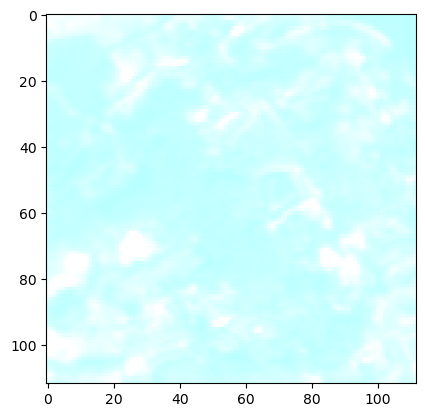

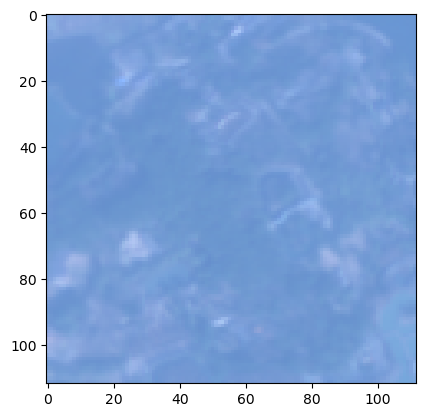

Band 1
Max: 287
Min: 102
Mean: 180.32182716836735
Std: 33.31709293647911


Band 2
Max: 317
Min: 182
Mean: 210.11479591836735
Std: 17.101626137300023


Band 3
Max: 355
Min: 258
Mean: 280.93351403061223
Std: 11.65597745722003


Band 4
Max: 459
Min: 368
Mean: 384.25310905612247
Std: 9.343149035118914




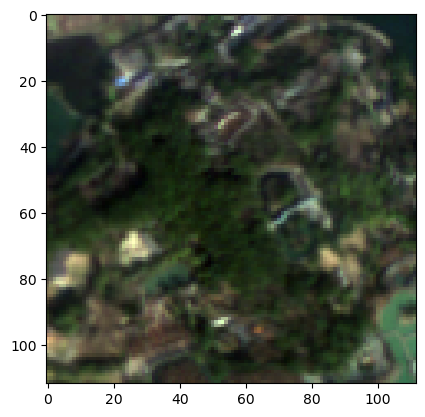

In [8]:
####################
####################
###Comprobaciones###
####################
####################


random_idx = np.random.randint(0, 147895)

img = dataset['train'][random_idx]['raw_data']

img = np.uint16(np.array(img))

plt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()

# cast image to uint8
max_value = np.max(img)
matrix_uint8_scaled = ((img / max_value) * 255).astype(np.uint8)

plt.imshow(matrix_uint8_scaled[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()


# for each band print info about its pixel values

for i in range(4):
    print(f"Band {i+1}")
    print(f"Max: {np.max(img[:,:,i])}")
    print(f"Min: {np.min(img[:,:,i])}")
    print(f"Mean: {np.mean(img[:,:,i])}")
    print(f"Std: {np.std(img[:,:,i])}")
    print("\n")

# Apply min-max normalization to each band
img_norm = np.zeros_like(img, dtype=np.float32)
for i in range(4):
    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))

# show the normalized image
plt.imshow(img_norm[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()


####################
####################
###Comprobaciones###
####################
####################


In [9]:
"""
# Define a transformation function to reduce channels
def cast_to_8bit(example):
    img = example['raw_data'] 
    
    img = np.uint16(np.array(img))
    max_value = np.max(img)
    uint8_img = ((img / max_value) * 255).astype(np.uint8)
    

    example['raw_data'] = uint8_img

    return example

# Apply the transformation to the dataset
dataset = dataset.map(cast_to_8bit)"""

"\n# Define a transformation function to reduce channels\ndef cast_to_8bit(example):\n    img = example['raw_data'] \n    \n    img = np.uint16(np.array(img))\n    max_value = np.max(img)\n    uint8_img = ((img / max_value) * 255).astype(np.uint8)\n    \n\n    example['raw_data'] = uint8_img\n\n    return example\n\n# Apply the transformation to the dataset\ndataset = dataset.map(cast_to_8bit)"

In [10]:
####################
####################
###Comprobaciones###
####################
####################
"""

random_idx = np.random.randint(0, 147895)

img = dataset['train'][random_idx]['raw_data']

img = np.uint8(np.array(img))

plt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()


# for each band print info about its pixel values

for i in range(4):
    print(f"Band {i+1}")
    print(f"Max: {np.max(img[:,:,i])}")
    print(f"Min: {np.min(img[:,:,i])}")
    print(f"Mean: {np.mean(img[:,:,i])}")
    print(f"Std: {np.std(img[:,:,i])}")
    print("\n")

# Apply min-max normalization to each band
img_norm = np.zeros_like(img, dtype=np.float32)
for i in range(4):
    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))

# show the normalized image
plt.imshow(img_norm[:,:,[1,2,3]])# Las bandas están en formato NIR R G B
plt.show()

"""
####################
####################
###Comprobaciones###
####################
####################

'\n\nrandom_idx = np.random.randint(0, 147895)\n\nimg = dataset[\'train\'][random_idx][\'raw_data\']\n\nimg = np.uint8(np.array(img))\n\nplt.imshow(img[:,:,[1,2,3]])# Las bandas están en formato NIR R G B\nplt.show()\n\n\n# for each band print info about its pixel values\n\nfor i in range(4):\n    print(f"Band {i+1}")\n    print(f"Max: {np.max(img[:,:,i])}")\n    print(f"Min: {np.min(img[:,:,i])}")\n    print(f"Mean: {np.mean(img[:,:,i])}")\n    print(f"Std: {np.std(img[:,:,i])}")\n    print("\n")\n\n# Apply min-max normalization to each band\nimg_norm = np.zeros_like(img, dtype=np.float32)\nfor i in range(4):\n    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))\n\n# show the normalized image\nplt.imshow(img_norm[:,:,[1,2,3]])# Las bandas están en formato NIR R G B\nplt.show()\n\n'

## Load the pretrained image proccesor, apply transforms, split and train.

In [11]:
"""
# read all images in the loaded dataset and calculate the mean and std of each band
means = np.zeros(4)
stds = np.zeros(4)
n = 0
for example in dataset['train']:
    img = example['raw_data']
    means += np.mean(img, axis=(0, 1))
    stds += np.std(img, axis=(0, 1))
    n += 1"""

"\n# read all images in the loaded dataset and calculate the mean and std of each band\nmeans = np.zeros(4)\nstds = np.zeros(4)\nn = 0\nfor example in dataset['train']:\n    img = example['raw_data']\n    means += np.mean(img, axis=(0, 1))\n    stds += np.std(img, axis=(0, 1))\n    n += 1"

In [12]:
"""print(means / n)
print(stds / n)"""

'print(means / n)\nprint(stds / n)'

In [13]:
from transformers import AutoImageProcessor
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
mean=image_processor.image_mean
std=image_processor.image_std

# esto lo añadí a macheta para que funcione con 4 canales
mean = [0.5, mean[0],mean[1],mean[2]] #NIR R G B
std = [0.25, std[0],std[1],std[2]] #NIR R G B
mod_image_processor = image_processor
mod_image_processor.image_std = std
mod_image_processor.image_mean = mean
print(mod_image_processor)

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.25,
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [14]:
# Load model directly
import torch
import numpy as np
from transformers import AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer, SwinConfig
from datasets import load_dataset 
from evaluate import load
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)
metric = load("accuracy")

labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

print(label2id)


normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
if "height" in image_processor.size:
    size = (image_processor.size["height"], image_processor.size["width"])
    crop_size = size
    max_size = None
elif "shortest_edge" in image_processor.size:
    size = image_processor.size["shortest_edge"]
    crop_size = (size, size)
    max_size = image_processor.size.get("longest_edge")




# BEFORE I CALL IT I NEED TO MAKE SURE THAT IT IS A NUMPY ARRAY
train_transforms = Compose(
        [
            ToTensor(),
            RandomResizedCrop(crop_size),
            RandomHorizontalFlip(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            ToTensor(),
            Resize(size),
            CenterCrop(crop_size),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    #"""Apply train_transforms across a batch."""
    #example_batch["pixel_values"] = [
    #    train_transforms(image.convert("RGB")) for image in example_batch["image"]
    #]
    """
    example_batch["pixel_values"] = []
    for image in example_batch["raw_data"]:
        array = np.array(image)
        # cast it to iunt8
        array = array.astype(np.uint8)
        array = train_transforms(array)
        example_batch["pixel_values"].append(array)
    """
    example_batch["pixel_values"] = [train_transforms(np.array(image).astype(np.float32)) for image in example_batch["raw_data"]]

    return example_batch

def preprocess_val(example_batch):
    #"""Apply val_transforms across a batch."""
    #example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    
    """
    example_batch["pixel_values"] = []
    for image in example_batch["raw_data"]:
        array = np.array(image)
        # cast it to iunt8
        array = array.astype(np.uint8)
        array = val_transforms(array)
        example_batch["pixel_values"].append(array)
        print(example_batch)
    """
    example_batch["pixel_values"] = [val_transforms(np.array(image).astype(np.float32)) for image in example_batch["raw_data"]]

    return example_batch



splits = dataset["train"].train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

print(splits)
print(train_ds)
print(val_ds)
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

{'airport': 0, 'arbor forest': 1, 'artificial meadow': 2, 'bareland': 3, 'dry cropland': 4, 'fish pond': 5, 'garden land': 6, 'industrial area': 7, 'irrigated field': 8, 'lake': 9, 'natural meadow': 10, 'overpass': 11, 'paddy field': 12, 'park': 13, 'pond': 14, 'railway station': 15, 'river': 16, 'road': 17, 'rural residential': 18, 'shrub forest': 19, 'snow': 20, 'square': 21, 'stadium': 22, 'urban residential': 23}
DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'raw_data'],
        num_rows: 133106
    })
    test: Dataset({
        features: ['image', 'label', 'raw_data'],
        num_rows: 14790
    })
})
Dataset({
    features: ['image', 'label', 'raw_data'],
    num_rows: 133106
})
Dataset({
    features: ['image', 'label', 'raw_data'],
    num_rows: 14790
})


In [15]:

# Load and modify the model configuration
config = SwinConfig.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
config.embed_dim = 96  # change embedding dimension to mask2former value
config.num_heads = [3, 6, 12, 24]  # change number of heads for each stage to mask2former value
config.depths = [2, 2, 6, 2]  # change depths for each stage to mask2former value
config.window_size = 7  # change window size to mask2former value
config.ape = False  # change absolute position embedding to mask2former value
config.drop_path_rate = 0.3  # change drop path rate to mask2former value
config.patch_norm = True  # change patch norm to mask2former value
config.id2label = id2label # add the labels of the dataset eurosat, we have 24 classes instead of 1000
config.label2id = label2id # add the labels of the dataset eurosat, we have 24 classes instead of 1000
config.num_channels = 4 # If I can get the multispectral images to work, I will have to change this value so that it uses the NIR value

# Making predictions

In [86]:
import os
import numpy as np
from osgeo import gdal

def read_image_gdal_to_numpy(image_path):
    ds = gdal.Open(image_path)
    data = ds.ReadAsArray()
    data = data.transpose(1,2,0)
    ds = None
    return data[:,:,::-1]# return format is NIRRGB

path_to_16bit_test = "/home/pablo.canosa/Datos/split_gaofen/test_16bit/"

# pick a random image from the folder
img_name = np.random.choice(os.listdir(path_to_16bit_test))

img_path = os.path.join(path_to_16bit_test, img_name)

img = read_image_gdal_to_numpy(img_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


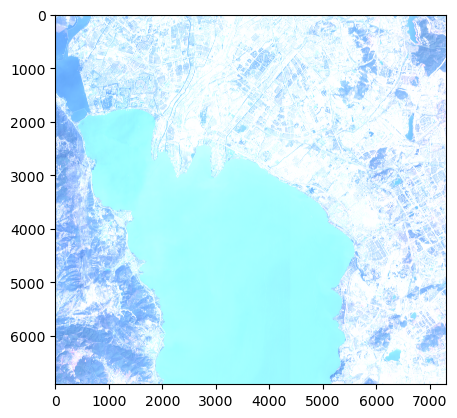

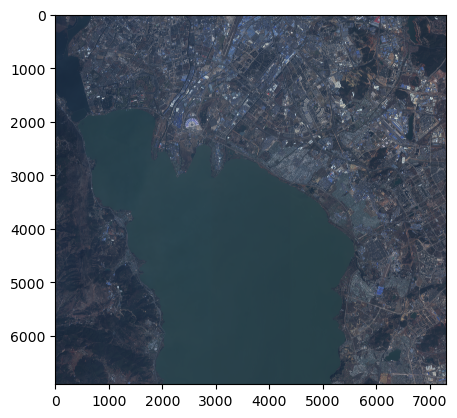

In [87]:
from matplotlib import pyplot as plt
# show the image
plt.imshow(img[:, :, [1,2,3]]) # NIR R G B # si no se muestra hacer un cast a uint16
plt.show()

# apply min-max normalization to each band
img_norm = np.zeros_like(img, dtype=np.float32)
for i in range(4):
    img_norm[:,:,i] = (img[:,:,i] - np.min(img[:,:,i])) / (np.max(img[:,:,i]) - np.min(img[:,:,i]))

plt.imshow(img_norm[:, :, [1,2,3]]) # NIR R G B
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


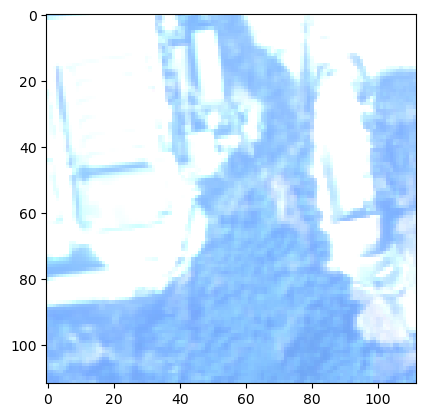

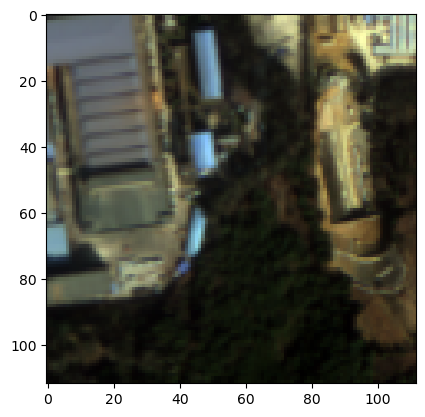

In [88]:
# create a random crop of 224x224
crop_size = 112

x = np.random.randint(0, img.shape[0] - crop_size)
y = np.random.randint(0, img.shape[1] - crop_size)

img_crop = img[x:x+crop_size, y:y+crop_size]

# show the crop
plt.imshow(img_crop[:, :, [1,2,3]]) # NIR R G B
plt.show()

# apply min-max normalization to each band
img_crop_norm = np.zeros_like(img_crop, dtype=np.float32)
for i in range(4):
    img_crop_norm[:,:,i] = (img_crop[:,:,i] - np.min(img_crop[:,:,i])) / (np.max(img_crop[:,:,i]) - np.min(img_crop[:,:,i]))

plt.imshow(img_crop_norm[:, :, [1,2,3]]) # NIR R G B
plt.show()

In [89]:
from torchvision.transforms import ToTensor, Normalize, RandomCrop,Resize
import torch

img = ToTensor()(np.float32(img_crop))
print(img.shape)



torch.Size([4, 112, 112])


In [90]:
normalized_image = normalize(img)
print(normalized_image.shape) 

# resize the image to 224x224
normalized_image = Resize((224, 224))(normalized_image)

normalized_image = normalized_image.reshape(1, 4, 224 ,224)



torch.Size([4, 112, 112])


In [91]:
# create a ransformers.image_processing_base.BatchFeature
encoding = {"pixel_values": normalized_image}
print(type(encoding))

<class 'dict'>


In [92]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

path = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/CLUSTERGPU5"

model = AutoModelForImageClassification.from_pretrained(path)

In [93]:
import torch

# forward pass
with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits

In [94]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: arbor forest


# PKL creation

In [1]:
import torch
import json
from safetensors.torch import load_file

path = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/CLUSTERGPU5/"

model = load_file(f'{path}model.safetensors')

#optimizer_state = torch.load(f'{path}optimizer.pt')

#scheduler_state = torch.load(f'{path}scheduler.pt')

#rng_state = torch.load(f'{path}rng_state.pth')

training_args = torch.load(f'{path}training_args.bin')

with open(f'{path}trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

with open(f'{path}preprocessor_config.json', 'r') as f:
    preprocessor_config = json.load(f)



combined_data = {
    'model': model,
#    'optimizer_state': optimizer_state,
#    'scheduler_state': scheduler_state,
#    'rng_state': rng_state,
#    'training_args': training_args,
#    'trainer_state': trainer_state,
#    'preprocessor_config': preprocessor_config
}

/tmp/ipykernel_4208/3780179327.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args = torch.load(f'{path}training_args.bin')


In [2]:
print(combined_data['model'].keys())

dict_keys(['classifier.bias', 'classifier.weight', 'swin.embeddings.norm.bias', 'swin.embeddings.norm.weight', 'swin.embeddings.patch_embeddings.projection.bias', 'swin.embeddings.patch_embeddings.projection.weight', 'swin.encoder.layers.0.blocks.0.attention.output.dense.bias', 'swin.encoder.layers.0.blocks.0.attention.output.dense.weight', 'swin.encoder.layers.0.blocks.0.attention.self.key.bias', 'swin.encoder.layers.0.blocks.0.attention.self.key.weight', 'swin.encoder.layers.0.blocks.0.attention.self.query.bias', 'swin.encoder.layers.0.blocks.0.attention.self.query.weight', 'swin.encoder.layers.0.blocks.0.attention.self.relative_position_bias_table', 'swin.encoder.layers.0.blocks.0.attention.self.relative_position_index', 'swin.encoder.layers.0.blocks.0.attention.self.value.bias', 'swin.encoder.layers.0.blocks.0.attention.self.value.weight', 'swin.encoder.layers.0.blocks.0.intermediate.dense.bias', 'swin.encoder.layers.0.blocks.0.intermediate.dense.weight', 'swin.encoder.layers.0.blo

In [2]:
import pickle

with open('./pkls/gaofen_swin_12_GPU5_epochs.pkl', 'wb') as f:
    pickle.dump(combined_data, f)
    

In [3]:
with open('./pkls/swin_tiny_patch4_window7_224.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [5]:
print(loaded_data)

{'model': OrderedDict([('patch_embed.proj.weight', tensor([[[[ 2.4984e-02,  5.3571e-02, -2.7889e-02, -2.4911e-02],
          [ 6.0391e-02,  6.3225e-02,  1.5118e-02,  1.5140e-02],
          [ 8.0021e-03,  1.9690e-02, -1.1751e-02, -2.9827e-02],
          [-8.3298e-02, -5.0598e-02, -4.5614e-02, -3.6676e-02]],

         [[ 1.1331e-02,  2.3383e-02, -2.9609e-02, -3.4024e-02],
          [ 4.3179e-02,  7.0976e-02,  2.9283e-02,  3.7289e-02],
          [-2.6797e-02,  2.3052e-02,  3.6354e-02, -1.2114e-02],
          [-6.2832e-02, -1.6171e-03,  2.4256e-02,  9.2983e-03]],

         [[-6.5791e-02, -1.7700e-02, -5.9535e-02, -6.1327e-02],
          [-1.3661e-02,  3.2764e-02,  4.6700e-03,  2.1067e-02],
          [-1.6673e-02, -1.2498e-02, -6.4821e-03,  4.0071e-02],
          [-2.4581e-02, -1.7405e-02,  1.2552e-02,  1.0373e-01]]],


        [[[ 2.7171e-03,  7.0097e-03,  7.5023e-03, -3.7904e-04],
          [ 7.4488e-03,  6.6826e-03,  7.1066e-03,  3.7000e-03],
          [ 6.6650e-03,  6.0924e-03,  4.6137e

In [4]:
m2f_keys = loaded_data['model'].keys()
# convert m2f keys to list
m2f_keys = list(m2f_keys)
print("Number of Mask2former keys: ",len(m2f_keys),m2f_keys)
finetunedkeys = combined_data['model'].keys()
finetunedkeys = list(finetunedkeys)
print("Number of fine tuned keys: ",len(finetunedkeys),finetunedkeys)

Number of Mask2former keys:  190 ['patch_embed.proj.weight', 'patch_embed.proj.bias', 'patch_embed.norm.weight', 'patch_embed.norm.bias', 'layers.0.blocks.0.norm1.weight', 'layers.0.blocks.0.norm1.bias', 'layers.0.blocks.0.attn.qkv.weight', 'layers.0.blocks.0.attn.qkv.bias', 'layers.0.blocks.0.attn.proj.weight', 'layers.0.blocks.0.attn.proj.bias', 'layers.0.blocks.0.norm2.weight', 'layers.0.blocks.0.norm2.bias', 'layers.0.blocks.0.mlp.fc1.weight', 'layers.0.blocks.0.mlp.fc1.bias', 'layers.0.blocks.0.mlp.fc2.weight', 'layers.0.blocks.0.mlp.fc2.bias', 'layers.0.blocks.1.norm1.weight', 'layers.0.blocks.1.norm1.bias', 'layers.0.blocks.1.attn.qkv.weight', 'layers.0.blocks.1.attn.qkv.bias', 'layers.0.blocks.1.attn.proj.weight', 'layers.0.blocks.1.attn.proj.bias', 'layers.0.blocks.1.norm2.weight', 'layers.0.blocks.1.norm2.bias', 'layers.0.blocks.1.mlp.fc1.weight', 'layers.0.blocks.1.mlp.fc1.bias', 'layers.0.blocks.1.mlp.fc2.weight', 'layers.0.blocks.1.mlp.fc2.bias', 'layers.0.downsample.norm.

In [9]:
import difflib

def find_most_similar(a, b):
    most_similar_pairs = []
    
    for string_a in a:
        # Use difflib.get_close_matches to find the most similar string in b
        closest_match = difflib.get_close_matches(string_a, b, n=1)
        if closest_match:
            most_similar_pairs.append((string_a, closest_match[0]))
        else:
            most_similar_pairs.append((string_a, None))
    
    return most_similar_pairs


similar_pairs = find_most_similar(finetunedkeys, m2f_keys)
for pair in similar_pairs:
    print(f"Most similar to '{pair[0]}' is '{pair[1]}'")


Most similar to 'classifier.bias' is 'None'
Most similar to 'classifier.weight' is 'None'
Most similar to 'swin.embeddings.norm.bias' is 'patch_embed.norm.bias'
Most similar to 'swin.embeddings.norm.weight' is 'patch_embed.norm.weight'
Most similar to 'swin.embeddings.patch_embeddings.projection.bias' is 'patch_embed.proj.bias'
Most similar to 'swin.embeddings.patch_embeddings.projection.weight' is 'patch_embed.proj.weight'
Most similar to 'swin.encoder.layers.0.blocks.0.attention.output.dense.bias' is 'layers.0.blocks.0.attn.proj.bias'
Most similar to 'swin.encoder.layers.0.blocks.0.attention.output.dense.weight' is 'layers.0.blocks.0.attn.proj.weight'
Most similar to 'swin.encoder.layers.0.blocks.0.attention.self.key.bias' is 'layers.0.blocks.0.attn.qkv.bias'
Most similar to 'swin.encoder.layers.0.blocks.0.attention.self.key.weight' is 'layers.0.blocks.0.attn.qkv.weight'
Most similar to 'swin.encoder.layers.0.blocks.0.attention.self.query.bias' is 'layers.0.blocks.0.attn.qkv.bias'
Mo

In [10]:
for pair in similar_pairs:
    if pair[1] is not None:
        print(f"Contents of '{pair[0]}' in finetuned model:")
        print(combined_data['model'][pair[0]].shape)
        print(f"Contents of '{pair[1]}' in mask2former model:")
        print(loaded_data['model'][pair[1]].shape)
        print("\n")
    else:
        print(f"No similar key found for '{pair[0]}'")

No similar key found for 'classifier.bias'
No similar key found for 'classifier.weight'
Contents of 'swin.embeddings.norm.bias' in finetuned model:
torch.Size([96])
Contents of 'patch_embed.norm.bias' in mask2former model:
torch.Size([96])


Contents of 'swin.embeddings.norm.weight' in finetuned model:
torch.Size([96])
Contents of 'patch_embed.norm.weight' in mask2former model:
torch.Size([96])


Contents of 'swin.embeddings.patch_embeddings.projection.bias' in finetuned model:
torch.Size([96])
Contents of 'patch_embed.proj.bias' in mask2former model:
torch.Size([96])


Contents of 'swin.embeddings.patch_embeddings.projection.weight' in finetuned model:
torch.Size([96, 4, 4, 4])
Contents of 'patch_embed.proj.weight' in mask2former model:
torch.Size([96, 3, 4, 4])


Contents of 'swin.encoder.layers.0.blocks.0.attention.output.dense.bias' in finetuned model:
torch.Size([96])
Contents of 'layers.0.blocks.0.attn.proj.bias' in mask2former model:
torch.Size([96])


Contents of 'swin.encoder.

In [11]:
# I want to change the name of the keys in the finetuned model to match the names in the mask2former model
# I will create a new dictionary with the new keys
new_model = {}
for pair in similar_pairs:
    if pair[1] is not None:
        new_model[pair[1]] = combined_data['model'][pair[0]]
    else:
        new_model[pair[0]] = combined_data['model'][pair[0]]


# also add the keys that were not found in the mask2former model
for key in finetunedkeys:
    if key not in [pair[0] for pair in similar_pairs]:
        new_model[key] = combined_data['model'][key]

print("Picked Fine Tuned keys: ",len(new_model.keys()),new_model.keys())

Picked Fine Tuned keys:  113 dict_keys(['classifier.bias', 'classifier.weight', 'patch_embed.norm.bias', 'patch_embed.norm.weight', 'patch_embed.proj.bias', 'patch_embed.proj.weight', 'layers.0.blocks.0.attn.proj.bias', 'layers.0.blocks.0.attn.proj.weight', 'layers.0.blocks.0.attn.qkv.bias', 'layers.0.blocks.0.attn.qkv.weight', 'layers.0.blocks.0.attn.relative_position_bias_table', 'layers.0.blocks.0.attn.relative_position_index', 'layers.0.blocks.0.norm2.bias', 'layers.0.blocks.0.norm2.weight', 'layers.0.blocks.1.attn.proj.bias', 'layers.0.blocks.1.attn.proj.weight', 'layers.0.blocks.1.attn.qkv.bias', 'layers.0.blocks.1.attn.qkv.weight', 'layers.0.blocks.1.attn.relative_position_bias_table', 'layers.0.blocks.1.attn.relative_position_index', 'layers.0.blocks.1.norm2.bias', 'layers.0.blocks.1.norm2.weight', 'layers.0.downsample.norm.bias', 'layers.0.downsample.norm.weight', 'layers.0.downsample.reduction.weight', 'layers.1.blocks.0.attn.proj.bias', 'layers.1.blocks.0.attn.proj.weight', 

In [12]:
# show a comparison of the keys in the new model and the mask2former model

similar_pairs = find_most_similar(new_model, m2f_keys)
for pair in similar_pairs:
    print(f"Most similar to '{pair[0]}' is '{pair[1]}'")

Most similar to 'classifier.bias' is 'None'
Most similar to 'classifier.weight' is 'None'
Most similar to 'patch_embed.norm.bias' is 'patch_embed.norm.bias'
Most similar to 'patch_embed.norm.weight' is 'patch_embed.norm.weight'
Most similar to 'patch_embed.proj.bias' is 'patch_embed.proj.bias'
Most similar to 'patch_embed.proj.weight' is 'patch_embed.proj.weight'
Most similar to 'layers.0.blocks.0.attn.proj.bias' is 'layers.0.blocks.0.attn.proj.bias'
Most similar to 'layers.0.blocks.0.attn.proj.weight' is 'layers.0.blocks.0.attn.proj.weight'
Most similar to 'layers.0.blocks.0.attn.qkv.bias' is 'layers.0.blocks.0.attn.qkv.bias'
Most similar to 'layers.0.blocks.0.attn.qkv.weight' is 'layers.0.blocks.0.attn.qkv.weight'
Most similar to 'layers.0.blocks.0.attn.relative_position_bias_table' is 'layers.0.blocks.0.attn.relative_position_bias_table'
Most similar to 'layers.0.blocks.0.attn.relative_position_index' is 'layers.0.blocks.0.attn.relative_position_index'
Most similar to 'layers.0.bloc

In [12]:
import pickle

with open('./pkls/LATEST', 'wb') as f:
    pickle.dump(new_model, f)

# New PKL weights comparison, so I dont lose useful keys and training is random

In [5]:
import torch
import json
from safetensors.torch import load_file

path = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/CLUSTERGPU5/"

model = load_file(f'{path}model.safetensors')

#optimizer_state = torch.load(f'{path}optimizer.pt')

#scheduler_state = torch.load(f'{path}scheduler.pt')

#rng_state = torch.load(f'{path}rng_state.pth')

training_args = torch.load(f'{path}training_args.bin')

with open(f'{path}trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

with open(f'{path}preprocessor_config.json', 'r') as f:
    preprocessor_config = json.load(f)



hf_finetune = {
    'model': model,
#    'optimizer_state': optimizer_state,
#    'scheduler_state': scheduler_state,
#    'rng_state': rng_state,
#    'training_args': training_args,
#    'trainer_state': trainer_state,
#    'preprocessor_config': preprocessor_config
}


/tmp/ipykernel_4208/806902693.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args = torch.load(f'{path}training_args.bin')


In [6]:
import pickle

#with open('./pkls/gaofen_swin_12_GPU5_epochs.pkl', 'wb') as f:
#    pickle.dump(hf_finetune, f)

with open('./pkls/swin_tiny_patch4_window7_224.pkl', 'rb') as f:
    m2f_version = pickle.load(f)

# Show the first 15 keys for each model
hf_keys = list(hf_finetune["model"].keys())
m2f_keys = list(m2f_version["model"].keys())

# I want a beauty print with one key per line and shifted to the right by each key's length
def pretty_print_keys(keys):
    for key in keys:
        print(f"{key:>{len(key)}}")

pretty_print_keys(m2f_keys)
        

patch_embed.proj.weight
patch_embed.proj.bias
patch_embed.norm.weight
patch_embed.norm.bias
layers.0.blocks.0.norm1.weight
layers.0.blocks.0.norm1.bias
layers.0.blocks.0.attn.qkv.weight
layers.0.blocks.0.attn.qkv.bias
layers.0.blocks.0.attn.proj.weight
layers.0.blocks.0.attn.proj.bias
layers.0.blocks.0.norm2.weight
layers.0.blocks.0.norm2.bias
layers.0.blocks.0.mlp.fc1.weight
layers.0.blocks.0.mlp.fc1.bias
layers.0.blocks.0.mlp.fc2.weight
layers.0.blocks.0.mlp.fc2.bias
layers.0.blocks.1.norm1.weight
layers.0.blocks.1.norm1.bias
layers.0.blocks.1.attn.qkv.weight
layers.0.blocks.1.attn.qkv.bias
layers.0.blocks.1.attn.proj.weight
layers.0.blocks.1.attn.proj.bias
layers.0.blocks.1.norm2.weight
layers.0.blocks.1.norm2.bias
layers.0.blocks.1.mlp.fc1.weight
layers.0.blocks.1.mlp.fc1.bias
layers.0.blocks.1.mlp.fc2.weight
layers.0.blocks.1.mlp.fc2.bias
layers.0.downsample.norm.weight
layers.0.downsample.norm.bias
layers.1.blocks.0.norm1.weight
layers.1.blocks.0.norm1.bias
layers.1.blocks.0.attn

## Comprobaciones de pesos

Principalmente me centro en aquellos pesos que me generan dudas

In [7]:
# PRINT THE VALUES OF a given mask2former key

key1 = "layers.0.blocks.1.attn_mask"
key2 = "layers.1.blocks.1.attn_mask"
key3 = "layers.2.blocks.1.attn_mask"
key4 = "layers.2.blocks.3.attn_mask"
key5 = "layers.2.blocks.5.attn_mask"

values1 = m2f_version["model"][key1]
values2 = m2f_version["model"][key2]
values3 = m2f_version["model"][key3]
values4 = m2f_version["model"][key4]
values5 = m2f_version["model"][key5]

# Print the different values of the keys
print("Shape of values1:", values1.shape)
print("Shape of values2:", values2.shape)
print("Shape of values3:", values3.shape)
print("Shape of values4:", values4.shape)
print("Shape of values5:", values5.shape)

# Compare values between keys
print("values3 == values4:", torch.equal(values3.flatten(), values4.flatten()))
print("values3 == values5:", torch.equal(values3.flatten(), values5.flatten()))
print("values4 == values5:", torch.equal(values4.flatten(), values5.flatten()))


Shape of values1: torch.Size([64, 49, 49])
Shape of values2: torch.Size([16, 49, 49])
Shape of values3: torch.Size([4, 49, 49])
Shape of values4: torch.Size([4, 49, 49])
Shape of values5: torch.Size([4, 49, 49])
values3 == values4: True
values3 == values5: True
values4 == values5: True


In [8]:
key1 = "norm.weight"
key2 = "norm.bias"
key3 = "head.weight"
key4 = "head.bias"

values1 = m2f_version["model"][key1]
values2 = m2f_version["model"][key2]
values3 = m2f_version["model"][key3]
values4 = m2f_version["model"][key4]

# Print the different values of the keys
print("Shape of values1:", values1.shape)
print("Shape of values2:", values2.shape)
print("Shape of values3:", values3.shape)
print("Shape of values4:", values4.shape)

#print the contents of the keys
print("Values of key1:", values1)
print("Values of key2:", values2)
print("Values of key3:", values3)



Shape of values1: torch.Size([768])
Shape of values2: torch.Size([768])
Shape of values3: torch.Size([1000, 768])
Shape of values4: torch.Size([1000])
Values of key1: tensor([ 2.0070e+00,  2.1079e+00,  2.1527e+00,  1.9945e+00,  2.0538e+00,
         1.9357e+00,  2.1641e+00,  2.0137e+00,  2.2207e+00,  2.1004e+00,
         2.1767e+00,  2.1185e+00,  1.9679e+00,  2.6322e+00,  2.0997e+00,
         2.1227e+00,  2.2836e+00,  2.4369e+00,  2.1273e+00,  2.0394e+00,
         2.2948e+00,  2.0629e+00,  2.0129e+00,  2.2704e+00,  3.0332e+00,
         1.8672e+00,  2.1101e+00,  2.0827e+00,  2.0340e+00,  2.0774e+00,
         2.1902e+00,  2.2720e+00,  2.3115e+00,  1.9725e+00,  2.2231e+00,
         2.0511e+00,  4.0257e-03,  2.1216e+00,  2.1912e+00,  1.9937e+00,
         2.0386e+00,  2.0222e+00,  2.0018e+00,  2.4291e+00,  2.1433e+00,
         2.1178e+00,  2.1486e+00,  2.1580e+00,  2.1465e+00,  2.5496e+00,
         1.9704e+00,  1.9694e+00,  2.0992e+00,  2.5562e+00,  1.7800e+00,
         1.9775e+00,  2.0253e+

In [9]:
key = "swin.embeddings.patch_embeddings.projection.weight"

values = hf_finetune["model"][key]

print("Shape of values1:", values.shape)

#print("Values of key1:", values)
###############################################
key = "patch_embed.proj.weight"

values = m2f_version["model"][key]

print("Shape of values1:", values.shape)

#print("Values of key1:", values)

Shape of values1: torch.Size([96, 4, 4, 4])
Shape of values1: torch.Size([96, 3, 4, 4])


In [12]:
for key in hf_finetune["model"].keys():
    if(hf_finetune["model"][key].shape.__contains__(768)):
        print(key)


classifier.weight
swin.encoder.layers.1.blocks.0.intermediate.dense.bias
swin.encoder.layers.1.blocks.0.intermediate.dense.weight
swin.encoder.layers.1.blocks.0.output.dense.weight
swin.encoder.layers.1.blocks.1.intermediate.dense.bias
swin.encoder.layers.1.blocks.1.intermediate.dense.weight
swin.encoder.layers.1.blocks.1.output.dense.weight
swin.encoder.layers.1.downsample.norm.bias
swin.encoder.layers.1.downsample.norm.weight
swin.encoder.layers.1.downsample.reduction.weight
swin.encoder.layers.2.downsample.reduction.weight
swin.encoder.layers.3.blocks.0.attention.output.dense.bias
swin.encoder.layers.3.blocks.0.attention.output.dense.weight
swin.encoder.layers.3.blocks.0.attention.self.key.bias
swin.encoder.layers.3.blocks.0.attention.self.key.weight
swin.encoder.layers.3.blocks.0.attention.self.query.bias
swin.encoder.layers.3.blocks.0.attention.self.query.weight
swin.encoder.layers.3.blocks.0.attention.self.value.bias
swin.encoder.layers.3.blocks.0.attention.self.value.weight
swin

In [15]:
key = "swin.layernorm.weight"

values = hf_finetune["model"][key]

print("Shape of values1:", values.shape)

#print("Values of key1:", values)

Shape of values1: torch.Size([768])


In [30]:
###########
### QKV ###
###########
print("WEIGTHS")
key_hf = "swin.encoder.layers.0.blocks.0.attention.self.query.weight"

query_w = hf_finetune["model"][key_hf]
print("Shape of hf query weight:", query_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.key.weight"

key_w = hf_finetune["model"][key_hf]
print("Shape of hf key weight:", key_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.value.weight"

value_w = hf_finetune["model"][key_hf]
print("Shape of hf value weight:", value_w.shape)

key_m2f_weights = "layers.0.blocks.0.attn.qkv.weight"
key_m2f_biases = "layers.0.blocks.0.attn.qkv.bias"

values_m2f_weights = m2f_version["model"][key_m2f_weights]

print("Shape of values_m2f_qkv_weights:", values_m2f_weights.shape)


print("BIASES")

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.query.bias"

query_w = hf_finetune["model"][key_hf]
print("Shape of hf query bias:", query_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.key.bias"

key_w = hf_finetune["model"][key_hf]
print("Shape of hf key bias:", key_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.value.bias"

value_w = hf_finetune["model"][key_hf]
print("Shape of hf value bias:", value_w.shape)

key_m2f_biases = "layers.0.blocks.0.attn.qkv.bias"

values_m2f_biases = m2f_version["model"][key_m2f_biases]

print("Shape of values_m2f_biases:", values_m2f_biases.shape)

WEIGTHS
Shape of hf query weight: torch.Size([96, 96])
Shape of hf key weight: torch.Size([96, 96])
Shape of hf value weight: torch.Size([96, 96])
Shape of values_m2f_qkv_weights: torch.Size([288, 96])
BIASES
Shape of hf query bias: torch.Size([96])
Shape of hf key bias: torch.Size([96])
Shape of hf value bias: torch.Size([96])
Shape of values_m2f_biases: torch.Size([288])


In [27]:
key_hf = "swin.encoder.layers.0.blocks.0.attention.self.query.bias"

query_w = hf_finetune["model"][key_hf]
print("Shape of hf query bias:", query_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.key.bias"

key_w = hf_finetune["model"][key_hf]
print("Shape of hf key bias:", key_w.shape)

key_hf = "swin.encoder.layers.0.blocks.0.attention.self.value.bias"

value_w = hf_finetune["model"][key_hf]
print("Shape of hf value bias:", value_w.shape)

key_m2f_biases = "layers.0.blocks.0.attn.qkv.bias"

values_m2f_biases = m2f_version["model"][key_m2f_biases]

print("Shape of values_m2f_biases:", values_m2f_biases.shape)

Shape of hf query bias: torch.Size([96])
Shape of hf key bias: torch.Size([96])
Shape of hf value bias: torch.Size([96])
Shape of values_m2f_biases: torch.Size([288])


In [22]:
def combine_qkv(query, key, value):
    return torch.cat([query, key, value], dim=0)

# combine the qkv weights
test = combine_qkv(query_w, key_w, value_w)
print("Shape of combined qkv weights:", test.shape)



Shape of combined qkv weights: torch.Size([288, 96])


In [25]:
import torch

def combine_qkv_weights_and_biases(hf_finetune, m2f_version, layer_num, block_num):
    # Define the Hugging Face keys for query, key, and value
    hf_q_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.query.weight"
    hf_k_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.key.weight"
    hf_v_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.value.weight"

    hf_q_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.query.bias"
    hf_k_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.key.bias"
    hf_v_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.value.bias"

    # Extract query, key, and value weights and biases from Hugging Face version
    query_weight = hf_finetune["model"][hf_q_weight]
    key_weight = hf_finetune["model"][hf_k_weight]
    value_weight = hf_finetune["model"][hf_v_weight]

    query_bias = hf_finetune["model"][hf_q_bias]
    key_bias = hf_finetune["model"][hf_k_bias]
    value_bias = hf_finetune["model"][hf_v_bias]

    # Combine the weights and biases by concatenating along the first dimension
    combined_weights = torch.cat([query_weight, key_weight, value_weight], dim=0)
    combined_biases = torch.cat([query_bias, key_bias, value_bias], dim=0)

    # Insert the combined weights and biases back into the Mask2Former version
    m2f_version["model"][f"layers.{layer_num}.blocks.{block_num}.attn.qkv.weight"] = combined_weights
    m2f_version["model"][f"layers.{layer_num}.blocks.{block_num}.attn.qkv.bias"] = combined_biases

    return m2f_version




layer_num = 0  
block_num = 0  
#test = combine_qkv_weights_and_biases(hf_finetune, m2f_version, layer_num, block_num)

#print("Combined QKV Weight Shape:", test["model"][f"layers.{layer_num}.blocks.{block_num}.attn.qkv.weight"].shape)
#print("Combined QKV Bias Shape:", test["model"][f"layers.{layer_num}.blocks.{block_num}.attn.qkv.bias"].shape)


Combined QKV Weight Shape: torch.Size([288, 96])
Combined QKV Bias Shape: torch.Size([288])


In [34]:
layers_and_blocks = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(3,0),(3,1)]
test = {}
for layer_num, block_num in layers_and_blocks:
    test = combine_qkv_weights_and_biases(hf_finetune, m2f_version, layer_num, block_num)
print(test["model"].keys())


odict_keys(['patch_embed.proj.weight', 'patch_embed.proj.bias', 'patch_embed.norm.weight', 'patch_embed.norm.bias', 'layers.0.blocks.0.norm1.weight', 'layers.0.blocks.0.norm1.bias', 'layers.0.blocks.0.attn.qkv.weight', 'layers.0.blocks.0.attn.qkv.bias', 'layers.0.blocks.0.attn.proj.weight', 'layers.0.blocks.0.attn.proj.bias', 'layers.0.blocks.0.norm2.weight', 'layers.0.blocks.0.norm2.bias', 'layers.0.blocks.0.mlp.fc1.weight', 'layers.0.blocks.0.mlp.fc1.bias', 'layers.0.blocks.0.mlp.fc2.weight', 'layers.0.blocks.0.mlp.fc2.bias', 'layers.0.blocks.1.norm1.weight', 'layers.0.blocks.1.norm1.bias', 'layers.0.blocks.1.attn.qkv.weight', 'layers.0.blocks.1.attn.qkv.bias', 'layers.0.blocks.1.attn.proj.weight', 'layers.0.blocks.1.attn.proj.bias', 'layers.0.blocks.1.norm2.weight', 'layers.0.blocks.1.norm2.bias', 'layers.0.blocks.1.mlp.fc1.weight', 'layers.0.blocks.1.mlp.fc1.bias', 'layers.0.blocks.1.mlp.fc2.weight', 'layers.0.blocks.1.mlp.fc2.bias', 'layers.0.downsample.norm.weight', 'layers.0.dow

# FINAL CONVERSION OF PKL FROM HF TO M2F

In [117]:
DICT_M2F_TO_HF = {
    "patch_embed.proj.weight" : "swin.embeddings.patch_embeddings.projection.weight",
    "patch_embed.proj.bias" : "swin.embeddings.patch_embeddings.projection.bias",
    "patch_embed.norm.weight" : "swin.embeddings.norm.weight",
    "patch_embed.norm.bias" : "swin.embeddings.norm.bias",
    
    
    "layers.0.blocks.0.norm1.weight": "swin.encoder.layers.0.blocks.0.layernorm_before.weight",
    "layers.0.blocks.0.norm1.bias": "swin.encoder.layers.0.blocks.0.layernorm_before.bias",
    #"layers.0.blocks.0.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.0.blocks.0.attention.self.query.weight",
    #"layers.0.blocks.0.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.0.blocks.0.attention.self.query.bias",
    #"layers.0.blocks.0.attn.qkv.weight[split_for_key]": "swin.encoder.layers.0.blocks.0.attention.self.key.weight",
    #"layers.0.blocks.0.attn.qkv.bias[split_for_key]": "swin.encoder.layers.0.blocks.0.attention.self.key.bias",
    #"layers.0.blocks.0.attn.qkv.weight[split_for_value]": "swin.encoder.layers.0.blocks.0.attention.self.value.weight",
    #"layers.0.blocks.0.attn.qkv.bias[split_for_value]": "swin.encoder.layers.0.blocks.0.attention.self.value.bias",
    "layers.0.blocks.0.attn.proj.weight": "swin.encoder.layers.0.blocks.0.attention.output.dense.weight",
    "layers.0.blocks.0.attn.proj.bias": "swin.encoder.layers.0.blocks.0.attention.output.dense.bias",
    "layers.0.blocks.0.norm2.weight": "swin.encoder.layers.0.blocks.0.layernorm_after.weight",
    "layers.0.blocks.0.norm2.bias": "swin.encoder.layers.0.blocks.0.layernorm_after.bias",
    "layers.0.blocks.0.mlp.fc1.weight": "swin.encoder.layers.0.blocks.0.intermediate.dense.weight",
    "layers.0.blocks.0.mlp.fc1.bias": "swin.encoder.layers.0.blocks.0.intermediate.dense.bias",
    "layers.0.blocks.0.mlp.fc2.weight": "swin.encoder.layers.0.blocks.0.output.dense.weight",
    "layers.0.blocks.0.mlp.fc2.bias": "swin.encoder.layers.0.blocks.0.output.dense.bias",
    "layers.0.blocks.0.attn.relative_position_index": "swin.encoder.layers.0.blocks.0.attention.self.relative_position_index",
    "layers.0.blocks.0.attn.relative_position_bias_table": "swin.encoder.layers.0.blocks.0.attention.self.relative_position_bias_table",
    
    "layers.0.blocks.1.norm1.weight": "swin.encoder.layers.0.blocks.1.layernorm_before.weight",
    "layers.0.blocks.1.norm1.bias": "swin.encoder.layers.0.blocks.1.layernorm_before.bias",
    #"layers.0.blocks.1.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.0.blocks.1.attention.self.query.weight",
    #"layers.0.blocks.1.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.0.blocks.1.attention.self.query.bias",
    #"layers.0.blocks.1.attn.qkv.weight[split_for_key]": "swin.encoder.layers.0.blocks.1.attention.self.key.weight",
    #"layers.0.blocks.1.attn.qkv.bias[split_for_key]": "swin.encoder.layers.0.blocks.1.attention.self.key.bias",
    #"layers.0.blocks.1.attn.qkv.weight[split_for_value]": "swin.encoder.layers.0.blocks.1.attention.self.value.weight",
    #"layers.0.blocks.1.attn.qkv.bias[split_for_value]": "swin.encoder.layers.0.blocks.1.attention.self.value.bias",
    "layers.0.blocks.1.attn.proj.weight": "swin.encoder.layers.0.blocks.1.attention.output.dense.weight",
    "layers.0.blocks.1.attn.proj.bias": "swin.encoder.layers.0.blocks.1.attention.output.dense.bias",
    "layers.0.blocks.1.norm2.weight": "swin.encoder.layers.0.blocks.1.layernorm_after.weight",
    "layers.0.blocks.1.norm2.bias": "swin.encoder.layers.0.blocks.1.layernorm_after.bias",
    "layers.0.blocks.1.mlp.fc1.weight": "swin.encoder.layers.0.blocks.1.intermediate.dense.weight",
    "layers.0.blocks.1.mlp.fc1.bias": "swin.encoder.layers.0.blocks.1.intermediate.dense.bias",
    "layers.0.blocks.1.mlp.fc2.weight": "swin.encoder.layers.0.blocks.1.output.dense.weight",
    "layers.0.blocks.1.mlp.fc2.bias": "swin.encoder.layers.0.blocks.1.output.dense.bias",
    "layers.0.blocks.1.attn.relative_position_index": "swin.encoder.layers.0.blocks.1.attention.self.relative_position_index",
    "layers.0.blocks.1.attn.relative_position_bias_table": "swin.encoder.layers.0.blocks.1.attention.self.relative_position_bias_table",


    "layers.0.downsample.norm.weight" : "swin.encoder.layers.0.downsample.norm.weight",
    "layers.0.downsample.norm.bias" : "swin.encoder.layers.0.downsample.norm.bias",
    "layers.0.downsample.reduction.weight" : "swin.encoder.layers.0.downsample.reduction.weight",
    

    "layers.1.blocks.0.norm1.weight": "swin.encoder.layers.1.blocks.0.layernorm_before.weight",
    "layers.1.blocks.0.norm1.bias": "swin.encoder.layers.1.blocks.0.layernorm_before.bias",
    #"layers.1.blocks.0.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.1.blocks.0.attention.self.query.weight",
    #"layers.1.blocks.0.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.1.blocks.0.attention.self.query.bias",
    #"layers.1.blocks.0.attn.qkv.weight[split_for_key]": "swin.encoder.layers.1.blocks.0.attention.self.key.weight",
    #"layers.1.blocks.0.attn.qkv.bias[split_for_key]": "swin.encoder.layers.1.blocks.0.attention.self.key.bias",
    #"layers.1.blocks.0.attn.qkv.weight[split_for_value]": "swin.encoder.layers.1.blocks.0.attention.self.value.weight",
    #"layers.1.blocks.0.attn.qkv.bias[split_for_value]": "swin.encoder.layers.1.blocks.0.attention.self.value.bias",
    "layers.1.blocks.0.attn.proj.weight": "swin.encoder.layers.1.blocks.0.attention.output.dense.weight",
    "layers.1.blocks.0.attn.proj.bias": "swin.encoder.layers.1.blocks.0.attention.output.dense.bias",
    "layers.1.blocks.0.norm2.weight": "swin.encoder.layers.1.blocks.0.layernorm_after.weight",
    "layers.1.blocks.0.norm2.bias": "swin.encoder.layers.1.blocks.0.layernorm_after.bias",
    "layers.1.blocks.0.mlp.fc1.weight": "swin.encoder.layers.1.blocks.0.intermediate.dense.weight",
    "layers.1.blocks.0.mlp.fc1.bias": "swin.encoder.layers.1.blocks.0.intermediate.dense.bias",
    "layers.1.blocks.0.mlp.fc2.weight": "swin.encoder.layers.1.blocks.0.output.dense.weight",
    "layers.1.blocks.0.mlp.fc2.bias": "swin.encoder.layers.1.blocks.0.output.dense.bias",
    "layers.1.blocks.0.attn.relative_position_index": "swin.encoder.layers.1.blocks.0.attention.self.relative_position_index",
    "layers.1.blocks.0.attn.relative_position_bias_table": "swin.encoder.layers.1.blocks.0.attention.self.relative_position_bias_table",
    
    "layers.1.blocks.1.norm1.weight": "swin.encoder.layers.1.blocks.1.layernorm_before.weight",
    "layers.1.blocks.1.norm1.bias": "swin.encoder.layers.1.blocks.1.layernorm_before.bias",
    #"layers.1.blocks.1.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.1.blocks.1.attention.self.query.weight",
    #"layers.1.blocks.1.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.1.blocks.1.attention.self.query.bias",
    #"layers.1.blocks.1.attn.qkv.weight[split_for_key]": "swin.encoder.layers.1.blocks.1.attention.self.key.weight",
    #"layers.1.blocks.1.attn.qkv.bias[split_for_key]": "swin.encoder.layers.1.blocks.1.attention.self.key.bias",
    #"layers.1.blocks.1.attn.qkv.weight[split_for_value]": "swin.encoder.layers.1.blocks.1.attention.self.value.weight",
    #"layers.1.blocks.1.attn.qkv.bias[split_for_value]": "swin.encoder.layers.1.blocks.1.attention.self.value.bias",
    "layers.1.blocks.1.attn.proj.weight": "swin.encoder.layers.1.blocks.1.attention.output.dense.weight",
    "layers.1.blocks.1.attn.proj.bias": "swin.encoder.layers.1.blocks.1.attention.output.dense.bias",
    "layers.1.blocks.1.norm2.weight": "swin.encoder.layers.1.blocks.1.layernorm_after.weight",
    "layers.1.blocks.1.norm2.bias": "swin.encoder.layers.1.blocks.1.layernorm_after.bias",
    "layers.1.blocks.1.mlp.fc1.weight": "swin.encoder.layers.1.blocks.1.intermediate.dense.weight",
    "layers.1.blocks.1.mlp.fc1.bias": "swin.encoder.layers.1.blocks.1.intermediate.dense.bias",
    "layers.1.blocks.1.mlp.fc2.weight": "swin.encoder.layers.1.blocks.1.output.dense.weight",
    "layers.1.blocks.1.mlp.fc2.bias": "swin.encoder.layers.1.blocks.1.output.dense.bias",
    "layers.1.blocks.1.attn.relative_position_index": "swin.encoder.layers.1.blocks.1.attention.self.relative_position_index",
    "layers.1.blocks.1.attn.relative_position_bias_table": "swin.encoder.layers.1.blocks.1.attention.self.relative_position_bias_table",


    "layers.1.downsample.norm.weight" : "swin.encoder.layers.1.downsample.norm.weight",
    "layers.1.downsample.norm.bias" : "swin.encoder.layers.1.downsample.norm.bias",
    "layers.1.downsample.reduction.weight" : "swin.encoder.layers.1.downsample.reduction.weight",

    
    "layers.2.blocks.0.norm1.weight": "swin.encoder.layers.2.blocks.0.layernorm_before.weight",
    "layers.2.blocks.0.norm1.bias": "swin.encoder.layers.2.blocks.0.layernorm_before.bias",
    #"layers.2.blocks.0.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.0.attention.self.query.weight",
    #"layers.2.blocks.0.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.0.attention.self.query.bias",
    #"layers.2.blocks.0.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.0.attention.self.key.weight",
    #"layers.2.blocks.0.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.0.attention.self.key.bias",
    #"layers.2.blocks.0.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.0.attention.self.value.weight",
    #"layers.2.blocks.0.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.0.attention.self.value.bias",
    "layers.2.blocks.0.attn.proj.weight": "swin.encoder.layers.2.blocks.0.attention.output.dense.weight",
    "layers.2.blocks.0.attn.proj.bias": "swin.encoder.layers.2.blocks.0.attention.output.dense.bias",
    "layers.2.blocks.0.norm2.weight": "swin.encoder.layers.2.blocks.0.layernorm_after.weight",
    "layers.2.blocks.0.norm2.bias": "swin.encoder.layers.2.blocks.0.layernorm_after.bias",
    "layers.2.blocks.0.mlp.fc1.weight": "swin.encoder.layers.2.blocks.0.intermediate.dense.weight",
    "layers.2.blocks.0.mlp.fc1.bias": "swin.encoder.layers.2.blocks.0.intermediate.dense.bias",
    "layers.2.blocks.0.mlp.fc2.weight": "swin.encoder.layers.2.blocks.0.output.dense.weight",
    "layers.2.blocks.0.mlp.fc2.bias": "swin.encoder.layers.2.blocks.0.output.dense.bias",
    "layers.2.blocks.0.attn.relative_position_index": "swin.encoder.layers.2.blocks.0.attention.self.relative_position_index",
    "layers.2.blocks.0.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.0.attention.self.relative_position_bias_table",
    
    "layers.2.blocks.1.norm1.weight": "swin.encoder.layers.2.blocks.1.layernorm_before.weight",
    "layers.2.blocks.1.norm1.bias": "swin.encoder.layers.2.blocks.1.layernorm_before.bias",
    #"layers.2.blocks.1.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.1.attention.self.query.weight",
    #"layers.2.blocks.1.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.1.attention.self.query.bias",
    #"layers.2.blocks.1.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.1.attention.self.key.weight",
    #"layers.2.blocks.1.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.1.attention.self.key.bias",
    #"layers.2.blocks.1.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.1.attention.self.value.weight",
    #"layers.2.blocks.1.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.1.attention.self.value.bias",
    "layers.2.blocks.1.attn.proj.weight": "swin.encoder.layers.2.blocks.1.attention.output.dense.weight",
    "layers.2.blocks.1.attn.proj.bias": "swin.encoder.layers.2.blocks.1.attention.output.dense.bias",
    "layers.2.blocks.1.norm2.weight": "swin.encoder.layers.2.blocks.1.layernorm_after.weight",
    "layers.2.blocks.1.norm2.bias": "swin.encoder.layers.2.blocks.1.layernorm_after.bias",
    "layers.2.blocks.1.mlp.fc1.weight": "swin.encoder.layers.2.blocks.1.intermediate.dense.weight",
    "layers.2.blocks.1.mlp.fc1.bias": "swin.encoder.layers.2.blocks.1.intermediate.dense.bias",
    "layers.2.blocks.1.mlp.fc2.weight": "swin.encoder.layers.2.blocks.1.output.dense.weight",
    "layers.2.blocks.1.mlp.fc2.bias": "swin.encoder.layers.2.blocks.1.output.dense.bias",
    "layers.2.blocks.1.attn.relative_position_index": "swin.encoder.layers.2.blocks.1.attention.self.relative_position_index",
    "layers.2.blocks.1.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.1.attention.self.relative_position_bias_table",
    
    "layers.2.blocks.2.norm1.weight": "swin.encoder.layers.2.blocks.2.layernorm_before.weight",
    "layers.2.blocks.2.norm1.bias": "swin.encoder.layers.2.blocks.2.layernorm_before.bias",
    #"layers.2.blocks.2.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.2.attention.self.query.weight",
    #"layers.2.blocks.2.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.2.attention.self.query.bias",
    #"layers.2.blocks.2.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.2.attention.self.key.weight",
    #"layers.2.blocks.2.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.2.attention.self.key.bias",
    #"layers.2.blocks.2.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.2.attention.self.value.weight",
    #"layers.2.blocks.2.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.2.attention.self.value.bias",
    "layers.2.blocks.2.attn.proj.weight": "swin.encoder.layers.2.blocks.2.attention.output.dense.weight",
    "layers.2.blocks.2.attn.proj.bias": "swin.encoder.layers.2.blocks.2.attention.output.dense.bias",
    "layers.2.blocks.2.norm2.weight": "swin.encoder.layers.2.blocks.2.layernorm_after.weight",
    "layers.2.blocks.2.norm2.bias": "swin.encoder.layers.2.blocks.2.layernorm_after.bias",
    "layers.2.blocks.2.mlp.fc1.weight": "swin.encoder.layers.2.blocks.2.intermediate.dense.weight",
    "layers.2.blocks.2.mlp.fc1.bias": "swin.encoder.layers.2.blocks.2.intermediate.dense.bias",
    "layers.2.blocks.2.mlp.fc2.weight": "swin.encoder.layers.2.blocks.2.output.dense.weight",
    "layers.2.blocks.2.mlp.fc2.bias": "swin.encoder.layers.2.blocks.2.output.dense.bias",
    "layers.2.blocks.2.attn.relative_position_index": "swin.encoder.layers.2.blocks.2.attention.self.relative_position_index",
    "layers.2.blocks.2.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.2.attention.self.relative_position_bias_table",
    
    "layers.2.blocks.3.norm1.weight": "swin.encoder.layers.2.blocks.3.layernorm_before.weight",
    "layers.2.blocks.3.norm1.bias": "swin.encoder.layers.2.blocks.3.layernorm_before.bias",
    #"layers.2.blocks.3.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.3.attention.self.query.weight",
    #"layers.2.blocks.3.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.3.attention.self.query.bias",
    #"layers.2.blocks.3.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.3.attention.self.key.weight",
    #"layers.2.blocks.3.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.3.attention.self.key.bias",
    #"layers.2.blocks.3.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.3.attention.self.value.weight",
    #"layers.2.blocks.3.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.3.attention.self.value.bias",
    "layers.2.blocks.3.attn.proj.weight": "swin.encoder.layers.2.blocks.3.attention.output.dense.weight",
    "layers.2.blocks.3.attn.proj.bias": "swin.encoder.layers.2.blocks.3.attention.output.dense.bias",
    "layers.2.blocks.3.norm2.weight": "swin.encoder.layers.2.blocks.3.layernorm_after.weight",
    "layers.2.blocks.3.norm2.bias": "swin.encoder.layers.2.blocks.3.layernorm_after.bias",
    "layers.2.blocks.3.mlp.fc1.weight": "swin.encoder.layers.2.blocks.3.intermediate.dense.weight",
    "layers.2.blocks.3.mlp.fc1.bias": "swin.encoder.layers.2.blocks.3.intermediate.dense.bias",
    "layers.2.blocks.3.mlp.fc2.weight": "swin.encoder.layers.2.blocks.3.output.dense.weight",
    "layers.2.blocks.3.mlp.fc2.bias": "swin.encoder.layers.2.blocks.3.output.dense.bias",
    "layers.2.blocks.3.attn.relative_position_index": "swin.encoder.layers.2.blocks.3.attention.self.relative_position_index",
    "layers.2.blocks.3.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.3.attention.self.relative_position_bias_table",
    
    "layers.2.blocks.4.norm1.weight": "swin.encoder.layers.2.blocks.4.layernorm_before.weight",
    "layers.2.blocks.4.norm1.bias": "swin.encoder.layers.2.blocks.4.layernorm_before.bias",
    #"layers.2.blocks.4.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.4.attention.self.query.weight",
    #"layers.2.blocks.4.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.4.attention.self.query.bias",
    #"layers.2.blocks.4.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.4.attention.self.key.weight",
    #"layers.2.blocks.4.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.4.attention.self.key.bias",
    #"layers.2.blocks.4.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.4.attention.self.value.weight",
    #"layers.2.blocks.4.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.4.attention.self.value.bias",
    "layers.2.blocks.4.attn.proj.weight": "swin.encoder.layers.2.blocks.4.attention.output.dense.weight",
    "layers.2.blocks.4.attn.proj.bias": "swin.encoder.layers.2.blocks.4.attention.output.dense.bias",
    "layers.2.blocks.4.norm2.weight": "swin.encoder.layers.2.blocks.4.layernorm_after.weight",
    "layers.2.blocks.4.norm2.bias": "swin.encoder.layers.2.blocks.4.layernorm_after.bias",
    "layers.2.blocks.4.mlp.fc1.weight": "swin.encoder.layers.2.blocks.4.intermediate.dense.weight",
    "layers.2.blocks.4.mlp.fc1.bias": "swin.encoder.layers.2.blocks.4.intermediate.dense.bias",
    "layers.2.blocks.4.mlp.fc2.weight": "swin.encoder.layers.2.blocks.4.output.dense.weight",
    "layers.2.blocks.4.mlp.fc2.bias": "swin.encoder.layers.2.blocks.4.output.dense.bias",
    "layers.2.blocks.4.attn.relative_position_index": "swin.encoder.layers.2.blocks.4.attention.self.relative_position_index",
    "layers.2.blocks.4.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.4.attention.self.relative_position_bias_table",
    
    "layers.2.blocks.5.norm1.weight": "swin.encoder.layers.2.blocks.5.layernorm_before.weight",
    "layers.2.blocks.5.norm1.bias": "swin.encoder.layers.2.blocks.5.layernorm_before.bias",
    #"layers.2.blocks.5.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.2.blocks.5.attention.self.query.weight",
    #"layers.2.blocks.5.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.2.blocks.5.attention.self.query.bias",
    #"layers.2.blocks.5.attn.qkv.weight[split_for_key]": "swin.encoder.layers.2.blocks.5.attention.self.key.weight",
    #"layers.2.blocks.5.attn.qkv.bias[split_for_key]": "swin.encoder.layers.2.blocks.5.attention.self.key.bias",
    #"layers.2.blocks.5.attn.qkv.weight[split_for_value]": "swin.encoder.layers.2.blocks.5.attention.self.value.weight",
    #"layers.2.blocks.5.attn.qkv.bias[split_for_value]": "swin.encoder.layers.2.blocks.5.attention.self.value.bias",
    "layers.2.blocks.5.attn.proj.weight": "swin.encoder.layers.2.blocks.5.attention.output.dense.weight",
    "layers.2.blocks.5.attn.proj.bias": "swin.encoder.layers.2.blocks.5.attention.output.dense.bias",
    "layers.2.blocks.5.norm2.weight": "swin.encoder.layers.2.blocks.5.layernorm_after.weight",
    "layers.2.blocks.5.norm2.bias": "swin.encoder.layers.2.blocks.5.layernorm_after.bias",
    "layers.2.blocks.5.mlp.fc1.weight": "swin.encoder.layers.2.blocks.5.intermediate.dense.weight",
    "layers.2.blocks.5.mlp.fc1.bias": "swin.encoder.layers.2.blocks.5.intermediate.dense.bias",
    "layers.2.blocks.5.mlp.fc2.weight": "swin.encoder.layers.2.blocks.5.output.dense.weight",
    "layers.2.blocks.5.mlp.fc2.bias": "swin.encoder.layers.2.blocks.5.output.dense.bias",
    "layers.2.blocks.5.attn.relative_position_index": "swin.encoder.layers.2.blocks.5.attention.self.relative_position_index",
    "layers.2.blocks.5.attn.relative_position_bias_table": "swin.encoder.layers.2.blocks.5.attention.self.relative_position_bias_table",


    "layers.2.downsample.norm.weight" : "swin.encoder.layers.2.downsample.norm.weight",
    "layers.2.downsample.norm.bias" : "swin.encoder.layers.2.downsample.norm.bias",
    "layers.2.downsample.reduction.weight" : "swin.encoder.layers.2.downsample.reduction.weight",


    "layers.3.blocks.0.norm1.weight": "swin.encoder.layers.3.blocks.0.layernorm_before.weight",
    "layers.3.blocks.0.norm1.bias": "swin.encoder.layers.3.blocks.0.layernorm_before.bias",
    #"layers.3.blocks.0.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.3.blocks.0.attention.self.query.weight",
    #"layers.3.blocks.0.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.3.blocks.0.attention.self.query.bias",
    #"layers.3.blocks.0.attn.qkv.weight[split_for_key]": "swin.encoder.layers.3.blocks.0.attention.self.key.weight",
    #"layers.3.blocks.0.attn.qkv.bias[split_for_key]": "swin.encoder.layers.3.blocks.0.attention.self.key.bias",
    #"layers.3.blocks.0.attn.qkv.weight[split_for_value]": "swin.encoder.layers.3.blocks.0.attention.self.value.weight",
    #"layers.3.blocks.0.attn.qkv.bias[split_for_value]": "swin.encoder.layers.3.blocks.0.attention.self.value.bias",
    "layers.3.blocks.0.attn.proj.weight": "swin.encoder.layers.3.blocks.0.attention.output.dense.weight",
    "layers.3.blocks.0.attn.proj.bias": "swin.encoder.layers.3.blocks.0.attention.output.dense.bias",
    "layers.3.blocks.0.norm2.weight": "swin.encoder.layers.3.blocks.0.layernorm_after.weight",
    "layers.3.blocks.0.norm2.bias": "swin.encoder.layers.3.blocks.0.layernorm_after.bias",
    "layers.3.blocks.0.mlp.fc1.weight": "swin.encoder.layers.3.blocks.0.intermediate.dense.weight",
    "layers.3.blocks.0.mlp.fc1.bias": "swin.encoder.layers.3.blocks.0.intermediate.dense.bias",
    "layers.3.blocks.0.mlp.fc2.weight": "swin.encoder.layers.3.blocks.0.output.dense.weight",
    "layers.3.blocks.0.mlp.fc2.bias": "swin.encoder.layers.3.blocks.0.output.dense.bias",
    "layers.3.blocks.0.attn.relative_position_index": "swin.encoder.layers.3.blocks.0.attention.self.relative_position_index",
    "layers.3.blocks.0.attn.relative_position_bias_table": "swin.encoder.layers.3.blocks.0.attention.self.relative_position_bias_table",
    
    "layers.3.blocks.1.norm1.weight": "swin.encoder.layers.3.blocks.1.layernorm_before.weight",
    "layers.3.blocks.1.norm1.bias": "swin.encoder.layers.3.blocks.1.layernorm_before.bias",
    #"layers.3.blocks.1.attn.qkv.weight[:split_for_query]": "swin.encoder.layers.3.blocks.1.attention.self.query.weight",
    #"layers.3.blocks.1.attn.qkv.bias[:split_for_query]": "swin.encoder.layers.3.blocks.1.attention.self.query.bias",
    #"layers.3.blocks.1.attn.qkv.weight[split_for_key]": "swin.encoder.layers.3.blocks.1.attention.self.key.weight",
    #"layers.3.blocks.1.attn.qkv.bias[split_for_key]": "swin.encoder.layers.3.blocks.1.attention.self.key.bias",
    #"layers.3.blocks.1.attn.qkv.weight[split_for_value]": "swin.encoder.layers.3.blocks.1.attention.self.value.weight",
    #"layers.3.blocks.1.attn.qkv.bias[split_for_value]": "swin.encoder.layers.3.blocks.1.attention.self.value.bias",
    "layers.3.blocks.1.attn.proj.weight": "swin.encoder.layers.3.blocks.1.attention.output.dense.weight",
    "layers.3.blocks.1.attn.proj.bias": "swin.encoder.layers.3.blocks.1.attention.output.dense.bias",
    "layers.3.blocks.1.norm2.weight": "swin.encoder.layers.3.blocks.1.layernorm_after.weight",
    "layers.3.blocks.1.norm2.bias": "swin.encoder.layers.3.blocks.1.layernorm_after.bias",
    "layers.3.blocks.1.mlp.fc1.weight": "swin.encoder.layers.3.blocks.1.intermediate.dense.weight",
    "layers.3.blocks.1.mlp.fc1.bias": "swin.encoder.layers.3.blocks.1.intermediate.dense.bias",
    "layers.3.blocks.1.mlp.fc2.weight": "swin.encoder.layers.3.blocks.1.output.dense.weight",
    "layers.3.blocks.1.mlp.fc2.bias": "swin.encoder.layers.3.blocks.1.output.dense.bias",
    "layers.3.blocks.1.attn.relative_position_index": "swin.encoder.layers.3.blocks.1.attention.self.relative_position_index",
    "layers.3.blocks.1.attn.relative_position_bias_table": "swin.encoder.layers.3.blocks.1.attention.self.relative_position_bias_table",

    "head.weight" : "classifier.weight",     # [1000,768] : [768,24]
    "head.bias" : "classifier.bias",         # [1000] : [24]

    "norm.weight" : "swin.layernorm.weight", # ([768]):([768])
    "norm.bias" : "swin.layernorm.bias",     # ([768]):([768])

}

SPECIFIC_M2F_KEYS = ["layers.0.blocks.1.attn_mask","layers.1.blocks.1.attn_mask", "layers.2.blocks.1.attn_mask", "layers.2.blocks.3.attn_mask", "layers.2.blocks.5.attn_mask"]

In [118]:
print("DICT_M2F_TO_HF keys:", len(DICT_M2F_TO_HF.keys()))
print("SPECIFIC_M2F_KEYS:", len(SPECIFIC_M2F_KEYS))
print("Original M2F keys:", len(m2f_version["model"].keys()))

DICT_M2F_TO_HF keys: 161
SPECIFIC_M2F_KEYS: 5
Original M2F keys: 190


In [119]:
import torch
import json
from safetensors.torch import load_file

path = "/home/pablo.canosa/gaofen_clasificacion/pruebas_pablo/CLUSTERGPU5/"

model = load_file(f'{path}model.safetensors')

hf_finetune = {
    'model': model,
}

import pickle


with open('./pkls/swin_tiny_patch4_window7_224.pkl', 'rb') as f:
    m2f_version = pickle.load(f)



In [120]:
#For each hf key, store its values with the name of the m2f key in a new dictionary

def map_weights_hf_to_m2f(hf_dict, key_map):
    new_dict = {}

    for m2f_key, hf_key in key_map.items():
        if hf_key in hf_dict:
            new_dict[m2f_key] = hf_dict[hf_key]
        else:
            print(f"Warning: HF key '{hf_key}' not found")

    return new_dict

non_qkv_dict = map_weights_hf_to_m2f(hf_finetune["model"], DICT_M2F_TO_HF)

print(len(non_qkv_dict.keys()))

#for key in new_dict.keys():
#    print(key, new_dict[key].shape)

161


In [121]:
# Query key value mapping

import torch

def combine_qkv_weights_and_biases(hf_finetune, dict_dest, layer_num, block_num):
    # Define the Hugging Face keys for query, key, and value
    hf_q_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.query.weight"
    hf_k_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.key.weight"
    hf_v_weight = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.value.weight"

    hf_q_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.query.bias"
    hf_k_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.key.bias"
    hf_v_bias = f"swin.encoder.layers.{layer_num}.blocks.{block_num}.attention.self.value.bias"

    # Extract query, key, and value weights and biases from Hugging Face version
    query_weight = hf_finetune["model"][hf_q_weight]
    key_weight = hf_finetune["model"][hf_k_weight]
    value_weight = hf_finetune["model"][hf_v_weight]

    query_bias = hf_finetune["model"][hf_q_bias]
    key_bias = hf_finetune["model"][hf_k_bias]
    value_bias = hf_finetune["model"][hf_v_bias]

    # Combine the weights and biases by concatenating along the first dimension
    combined_weights = torch.cat([query_weight, key_weight, value_weight], dim=0)
    combined_biases = torch.cat([query_bias, key_bias, value_bias], dim=0)

    # Insert the combined weights and biases back into the Mask2Former version
    dict_dest[f"layers.{layer_num}.blocks.{block_num}.attn.qkv.weight"] = combined_weights
    dict_dest[f"layers.{layer_num}.blocks.{block_num}.attn.qkv.bias"] = combined_biases

    return dict_dest



layers_and_blocks = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(3,0),(3,1)]
qkv_dict = {}
for layer_num, block_num in layers_and_blocks:
    qkv_dict = combine_qkv_weights_and_biases(hf_finetune, qkv_dict, layer_num, block_num)
#print(test.keys())
for key in qkv_dict.keys():
    print("NEW",key, test[key].shape)
    print("M2f",key, m2f_version["model"][key].shape)
    print("--------------------------------")


NEW layers.0.blocks.0.attn.qkv.weight torch.Size([288, 96])
M2f layers.0.blocks.0.attn.qkv.weight torch.Size([288, 96])
--------------------------------
NEW layers.0.blocks.0.attn.qkv.bias torch.Size([288])
M2f layers.0.blocks.0.attn.qkv.bias torch.Size([288])
--------------------------------
NEW layers.0.blocks.1.attn.qkv.weight torch.Size([288, 96])
M2f layers.0.blocks.1.attn.qkv.weight torch.Size([288, 96])
--------------------------------
NEW layers.0.blocks.1.attn.qkv.bias torch.Size([288])
M2f layers.0.blocks.1.attn.qkv.bias torch.Size([288])
--------------------------------
NEW layers.1.blocks.0.attn.qkv.weight torch.Size([576, 192])
M2f layers.1.blocks.0.attn.qkv.weight torch.Size([576, 192])
--------------------------------
NEW layers.1.blocks.0.attn.qkv.bias torch.Size([576])
M2f layers.1.blocks.0.attn.qkv.bias torch.Size([576])
--------------------------------
NEW layers.1.blocks.1.attn.qkv.weight torch.Size([576, 192])
M2f layers.1.blocks.1.attn.qkv.weight torch.Size([576, 

In [122]:
## Combine non-qkv and qkv dictionaries
full_custom_dict = {**non_qkv_dict, **qkv_dict}
print(len(full_custom_dict.keys()))

print("SPECIFIC_M2F_KEYS:", SPECIFIC_M2F_KEYS)
for non_hf_key in SPECIFIC_M2F_KEYS:
    print(non_hf_key)
    full_custom_dict[non_hf_key] = m2f_version["model"][non_hf_key]

print(len(full_custom_dict.keys()))

185
SPECIFIC_M2F_KEYS: ['layers.0.blocks.1.attn_mask', 'layers.1.blocks.1.attn_mask', 'layers.2.blocks.1.attn_mask', 'layers.2.blocks.3.attn_mask', 'layers.2.blocks.5.attn_mask']
layers.0.blocks.1.attn_mask
layers.1.blocks.1.attn_mask
layers.2.blocks.1.attn_mask
layers.2.blocks.3.attn_mask
layers.2.blocks.5.attn_mask
190


In [123]:
print("--------------------------")
for key in m2f_version["model"].keys():
    if(m2f_version["model"][key].shape != full_custom_dict[key].shape):
        print(m2f_version["model"][key].shape)
        print(full_custom_dict[key].shape)
        print("--------------------------")

--------------------------
torch.Size([96, 3, 4, 4])
torch.Size([96, 4, 4, 4])
--------------------------
torch.Size([1000, 768])
torch.Size([24, 768])
--------------------------
torch.Size([1000])
torch.Size([24])
--------------------------


In [124]:
import pickle
# Save the new dictionary to a file
# print all keys of M2F model
print("M2F keys:", m2f_version.keys())
print("M2F model keys:", m2f_version["__author__"])
print("M2F model keys:", m2f_version["matching_heuristics"])

finalDict = {
    "__author__": "Pablo Canosa",
    "matching_heuristics": "True",
    "model": full_custom_dict
}

print("FinalDict keys:", finalDict.keys())
print("FinalDict model keys:", len(finalDict["model"].keys()))




PATH_TO_PKL = './pkls/test_full_keys.pkl'




with open(PATH_TO_PKL, 'wb') as f:
    pickle.dump(finalDict, f)

M2F keys: dict_keys(['model', '__author__', 'matching_heuristics'])
M2F model keys: third_party
M2F model keys: True
FinalDict keys: dict_keys(['__author__', 'matching_heuristics', 'model'])
FinalDict model keys: 190


In [125]:
with open(PATH_TO_PKL, 'rb') as f:
    final_pkl_read = pickle.load(f)

In [127]:
print("Final model keys:", final_pkl_read.keys())
print("Author:", final_pkl_read["__author__"])
print("Matching Heuristics:", final_pkl_read["matching_heuristics"])
print("Model keys:", len(final_pkl_read["model"].keys()))

Final model keys: dict_keys(['__author__', 'matching_heuristics', 'model'])
Author: Pablo Canosa
Matching Heuristics: True
Model keys: 190
